In [4]:
import pandas  as pd
import numpy as np


In [7]:
df = pd.read_csv("/content/Global_AI_Content_Impact_Dataset.csv")

In [8]:
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [9]:
df.isnull().sum()

,0
Country,0
Year,0
Industry,0
AI Adoption Rate (%),0
AI-Generated Content Volume (TBs per year),0
Job Loss Due to AI (%),0
Revenue Increase Due to AI (%),0
Human-AI Collaboration Rate (%),0
Top AI Tools Used,0
Regulation Status,0


In [10]:
df.columns

Index(['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)'],
      dtype='object')

In [11]:
df.dtypes.values

array([dtype('O'), dtype('int64'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64')], dtype=object)

In [12]:
# Display column names, missing values, and data types
column_info = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values
})

# Display the column information
column_info


,Column Name,Data Type,Missing Values
0,Country,object,0
1,Year,int64,0
2,Industry,object,0
3,AI Adoption Rate (%),float64,0
4,AI-Generated Content Volume (TBs per year),float64,0
5,Job Loss Due to AI (%),float64,0
6,Revenue Increase Due to AI (%),float64,0
7,Human-AI Collaboration Rate (%),float64,0
8,Top AI Tools Used,object,0
9,Regulation Status,object,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

AI impact on job sectors


In [14]:
industry_total_job_loss = df.groupby("Industry")["Job Loss Due to AI (%)"].sum().reset_index()

In [15]:
industry_total_job_loss

,Industry,Job Loss Due to AI (%)
0,Automotive,549.42
1,Education,444.42
2,Finance,389.06
3,Gaming,734.51
4,Healthcare,434.85
5,Legal,479.98
6,Manufacturing,589.43
7,Marketing,371.98
8,Media,705.22
9,Retail,458.78


In [16]:

# Sort industries by AI impact in descending order
industry_total_job_loss_sorted = industry_total_job_loss.sort_values(by="Job Loss Due to AI (%)", ascending=False)

# here is the visual representation of the total number of job roles affected by AI as per industry.


<ipython-input-17-34f8f612708d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_total_job_loss_sorted, x="Job Loss Due to AI (%)", y="Industry", palette="Reds_r")


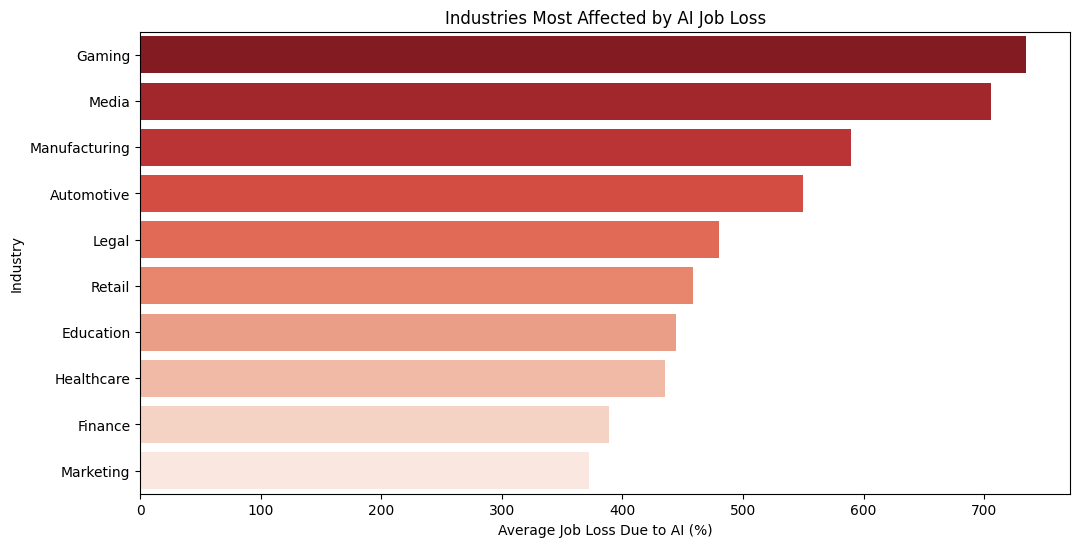

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_total_job_loss_sorted, x="Job Loss Due to AI (%)", y="Industry", palette="Reds_r")

# Add labels and title
plt.xlabel("Average Job Loss Due to AI (%)")
plt.ylabel("Industry")
plt.title("Industries Most Affected by AI Job Loss")
plt.show()

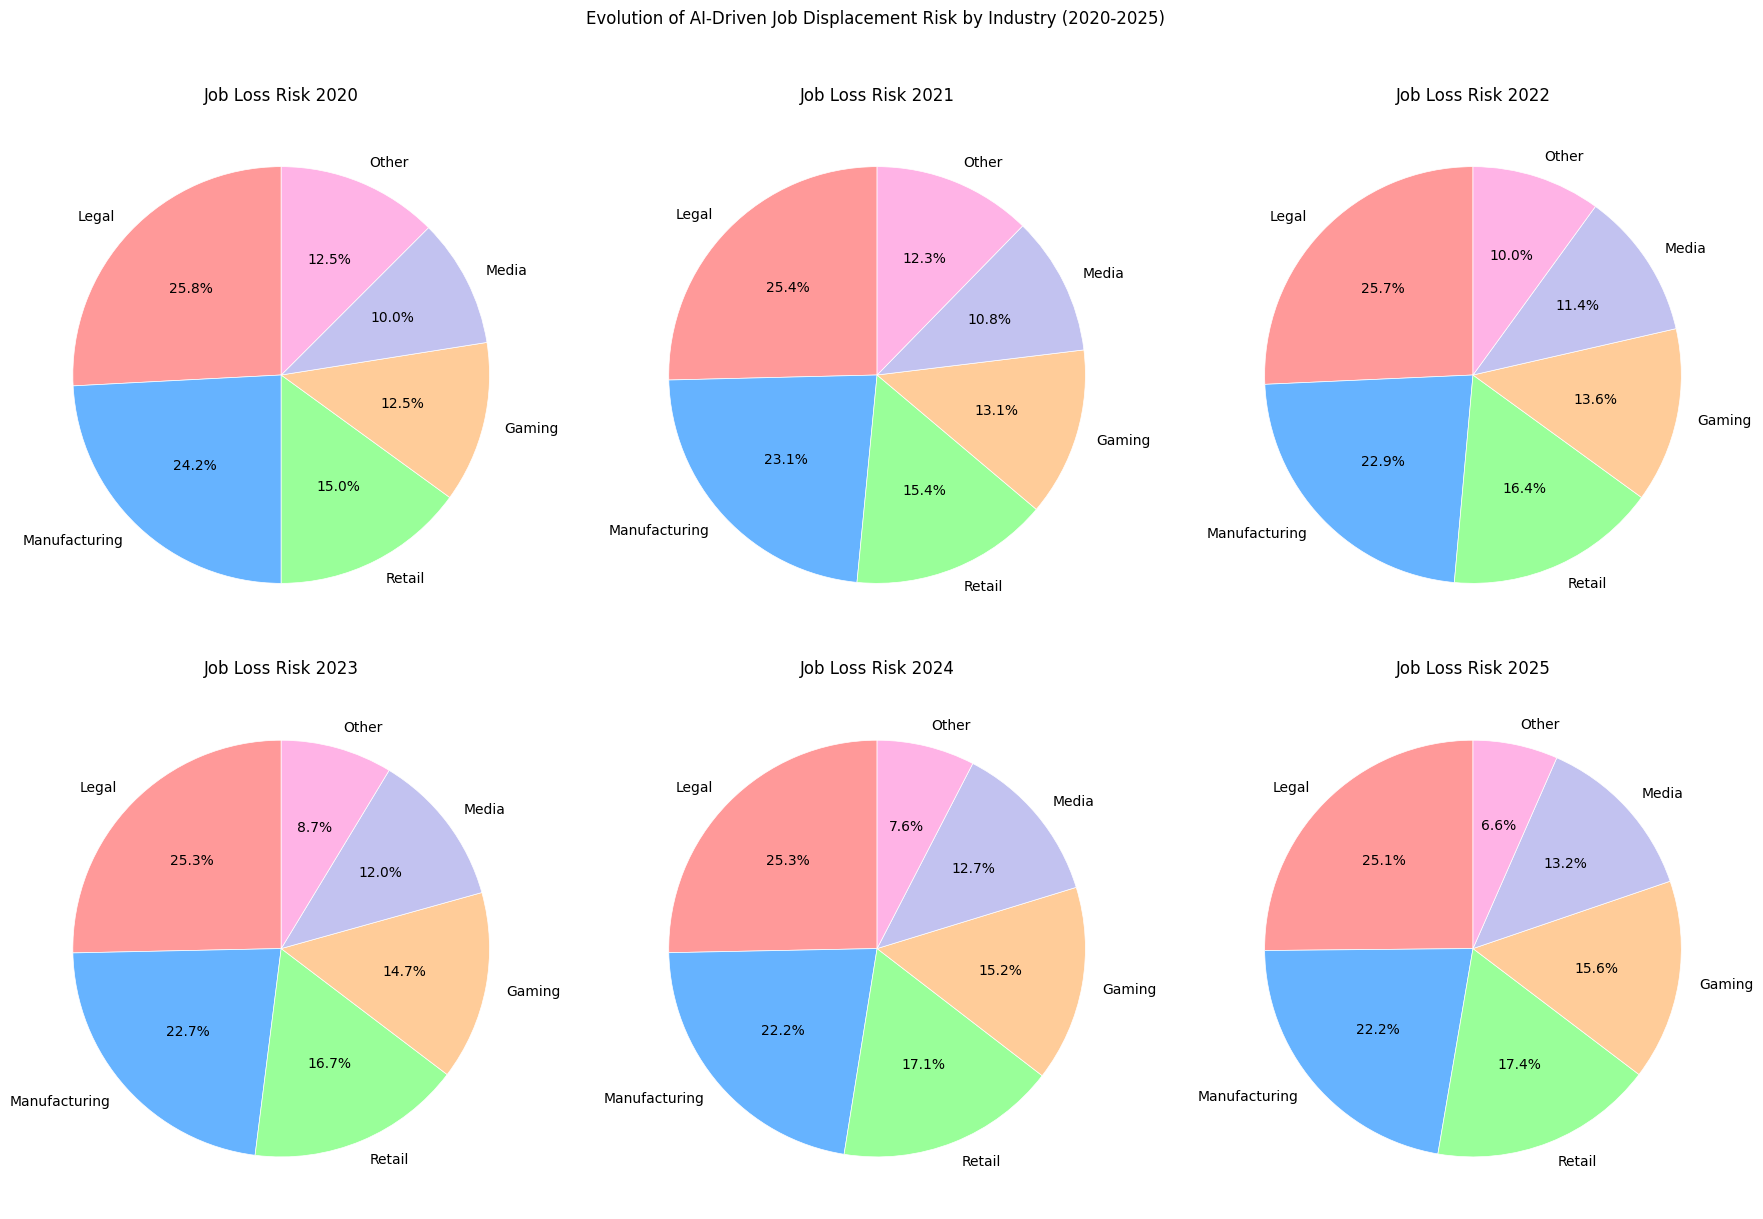

In [18]:
from math import ceil

# Sample processed data (replace with actual groupby from your dataset)
data = {
    2020: {'Legal': 31, 'Manufacturing': 29, 'Retail': 18, 'Gaming': 15, 'Media': 12, 'Other': 15},
    2021: {'Legal': 33, 'Manufacturing': 30, 'Retail': 20, 'Gaming': 17, 'Media': 14, 'Other': 16},
    2022: {'Legal': 36, 'Manufacturing': 32, 'Retail': 23, 'Gaming': 19, 'Media': 16, 'Other': 14},
    2023: {'Legal': 38, 'Manufacturing': 34, 'Retail': 25, 'Gaming': 22, 'Media': 18, 'Other': 13},
    2024: {'Legal': 40, 'Manufacturing': 35, 'Retail': 27, 'Gaming': 24, 'Media': 20, 'Other': 12},
    2025: {'Legal': 42, 'Manufacturing': 37, 'Retail': 29, 'Gaming': 26, 'Media': 22, 'Other': 11}
}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

for i, (year, values) in enumerate(data.items()):
    ax = axes[i//3, i%3]
    sizes = list(values.values())
    labels = list(values.keys())

    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
           startangle=90, colors=colors,
           wedgeprops={'edgecolor':'white', 'linewidth':0.5})
    ax.set_title(f'Job Loss Risk {year}', pad=10)

plt.suptitle('Evolution of AI-Driven Job Displacement Risk by Industry (2020-2025)', y=1.02)
plt.tight_layout()
plt.show()

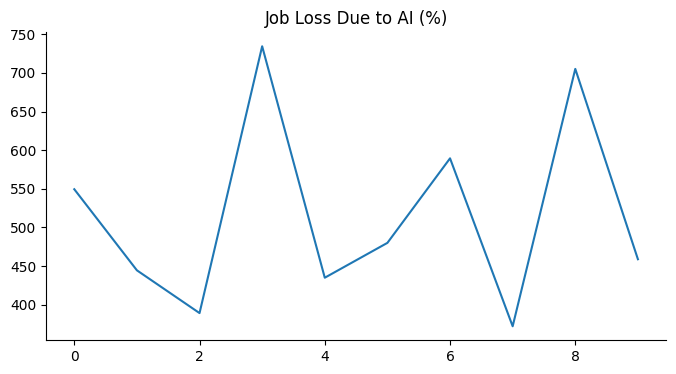

In [19]:
from matplotlib import pyplot as plt
industry_total_job_loss['Job Loss Due to AI (%)'].plot(kind='line', figsize=(8, 4), title='Job Loss Due to AI (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

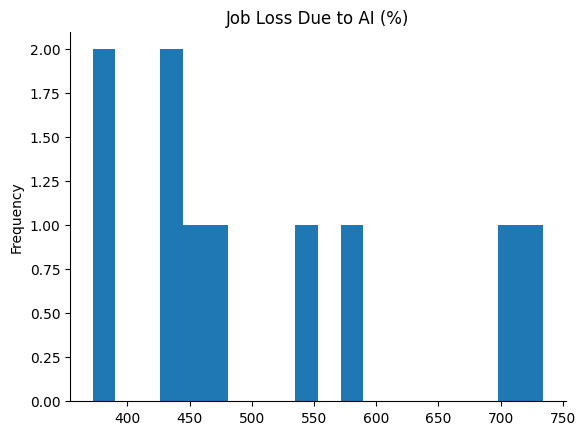

In [20]:
from matplotlib import pyplot as plt
industry_total_job_loss['Job Loss Due to AI (%)'].plot(kind='hist', bins=20, title='Job Loss Due to AI (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
# here is just Convert categorical job titles into numerical values (using OneHotEncoder).



In [22]:
#all company deformations


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-26-ae3f461cbd64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_total_job_loss_sorted, x="Job Loss Due to AI (%)", y="Industry", palette="Reds_r")


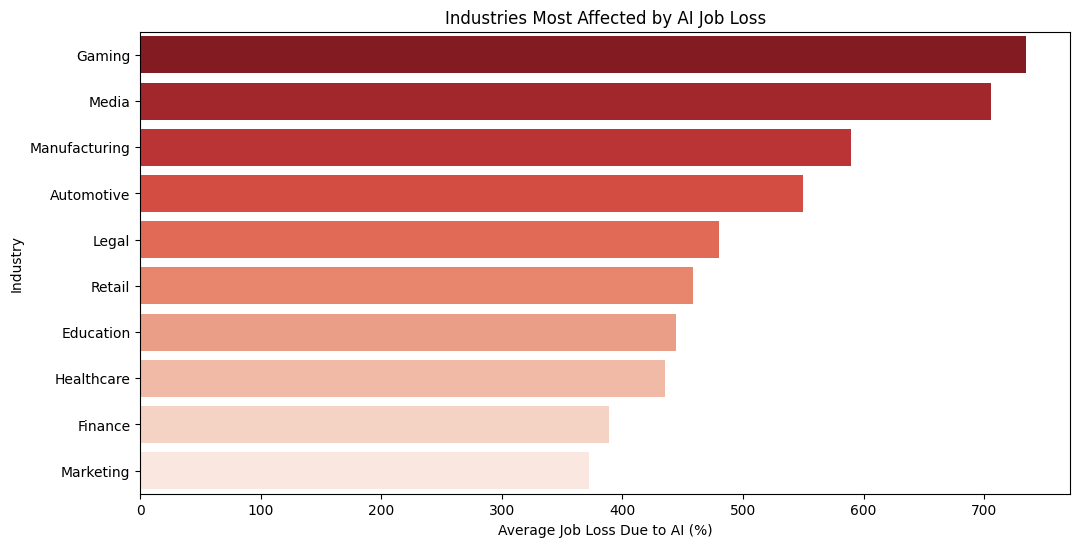

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_total_job_loss_sorted, x="Job Loss Due to AI (%)", y="Industry", palette="Reds_r")
plt.xlabel("Average Job Loss Due to AI (%)")
plt.ylabel("Industry")
plt.title("Industries Most Affected by AI Job Loss")
plt.show()

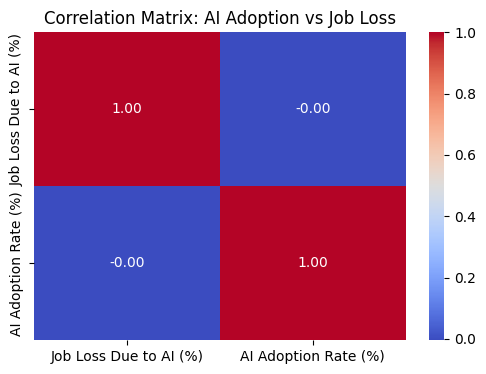

In [27]:
# Select numerical columns
numerical_cols = ["Job Loss Due to AI (%)", "AI Adoption Rate (%)"]
correlation = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: AI Adoption vs Job Loss")
plt.show()

Outliers Detecton


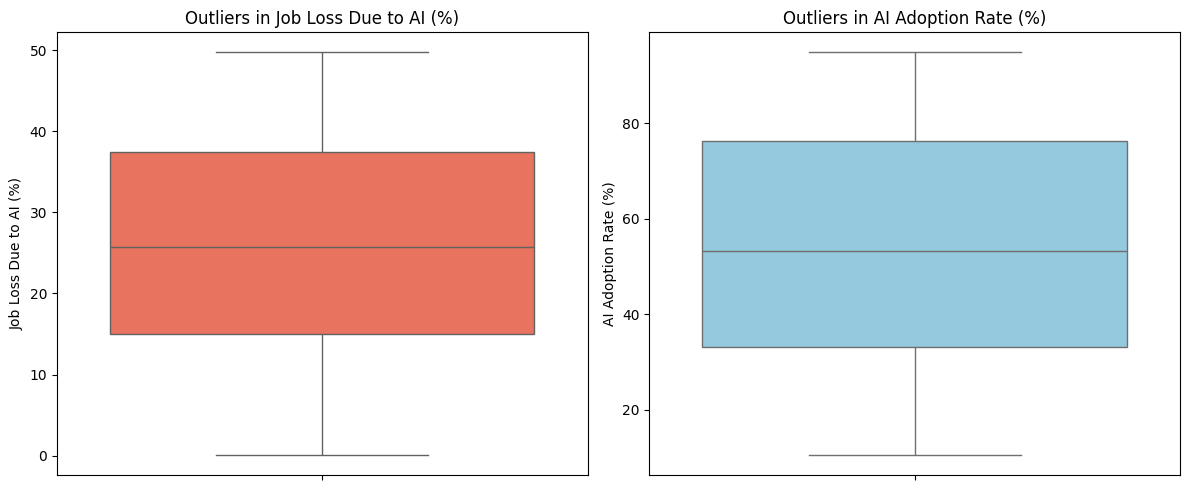

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Job Loss Due to AI
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Job Loss Due to AI (%)', color='tomato')
plt.title('Outliers in Job Loss Due to AI (%)')

# AI Adoption Rate
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='AI Adoption Rate (%)', color='skyblue')
plt.title('Outliers in AI Adoption Rate (%)')

plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in Job Loss
outliers_job_loss = detect_outliers_iqr(df, 'Job Loss Due to AI (%)')
# Detect outliers in AI Adoption Rate
outliers_adoption = detect_outliers_iqr(df, 'AI Adoption Rate (%)')

print("Outliers in Job Loss Due to AI (%):", len(outliers_job_loss))
print("Outliers in AI Adoption Rate (%):", len(outliers_adoption))


<Axes: xlabel='Job Loss Due to AI (%)'>

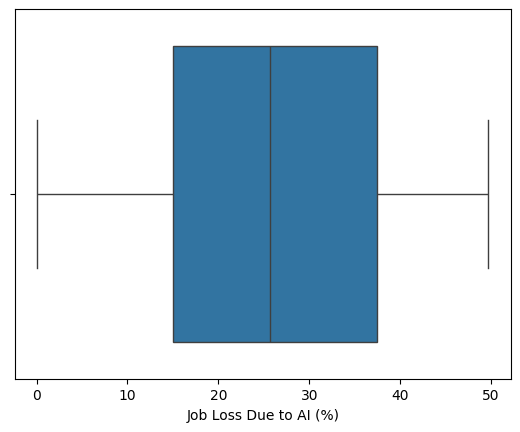

In [29]:
sns.boxplot(x = df['Job Loss Due to AI (%)'])

<Axes: xlabel='AI Adoption Rate (%)'>

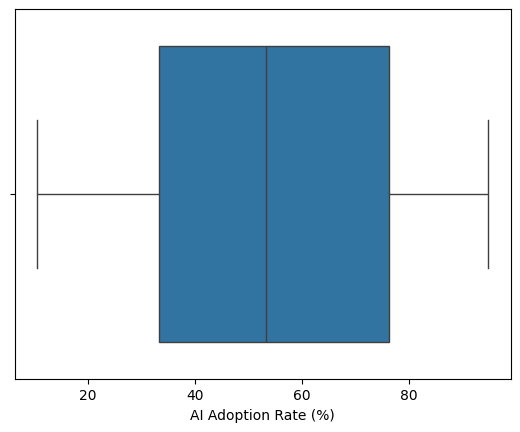

In [30]:
sns.boxplot(x = df['AI Adoption Rate (%)'])

In [31]:
#finfing IQR
percentile25=df['Job Loss Due to AI (%)'].quantile(0.25)

In [32]:
percentile75=df['Job Loss Due to AI (%)'].quantile(0.75)

In [33]:
percentile25

np.float64(14.995000000000001)